In [2]:
import numpy as np
import matplotlib.pyplot as plt
import backbone.Distributions as dist
import importlib
import numpy as np
from astroML.plotting import hist
import backbone.AstroMLmodified as AstroMLmod
import matplotlib.pyplot as plt
import matplotlib
import backbone.VISUAL as viz
import numpy as np
import backbone.Test as test
import random
from sklearn.metrics import davies_bouldin_score as davies
random.seed(42)
import math
import time as time
import pandas as pd
importlib.reload(dist)
importlib.reload(viz)
plt.rcParams.update({'font.size': 20}) 
from sklearn.utils import check_random_state
rng = check_random_state(42)
#Matplotlib settings
importlib.reload(dist)
importlib.reload(dist)
importlib.reload(AstroMLmod)

fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20})

cov_range = []

C:\Users\koket\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

# Gaussian Zoo generator

## The 2PCF as when varying cluster cohession

0.8424477291572955
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(29.441830035976835), np.float64(0.0))
Plotting


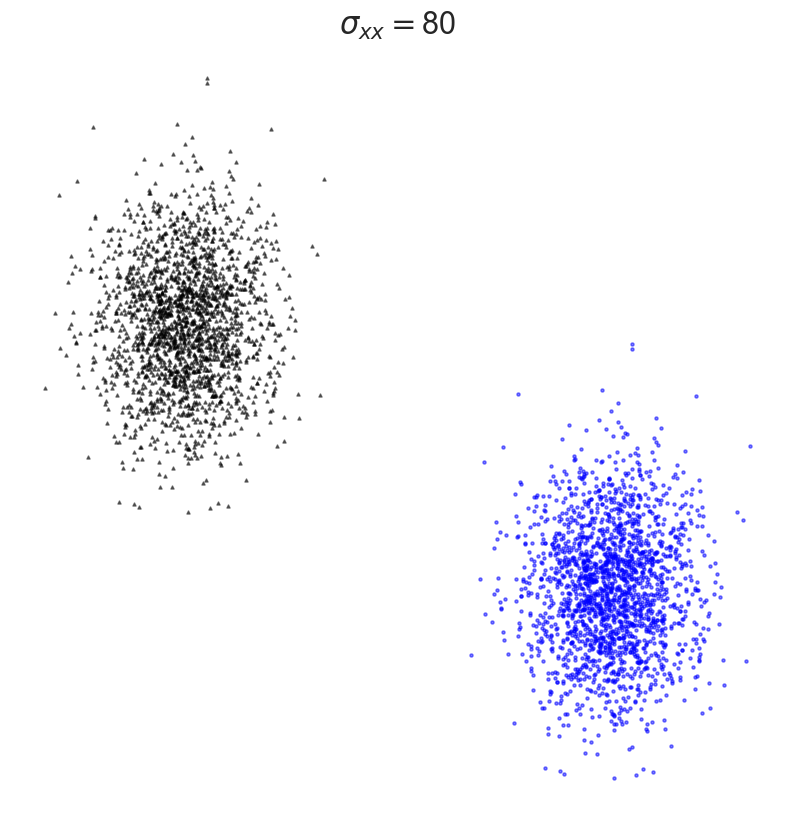

0.7988260851572557
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(23.43205399309869), np.float64(0.0))
Plotting


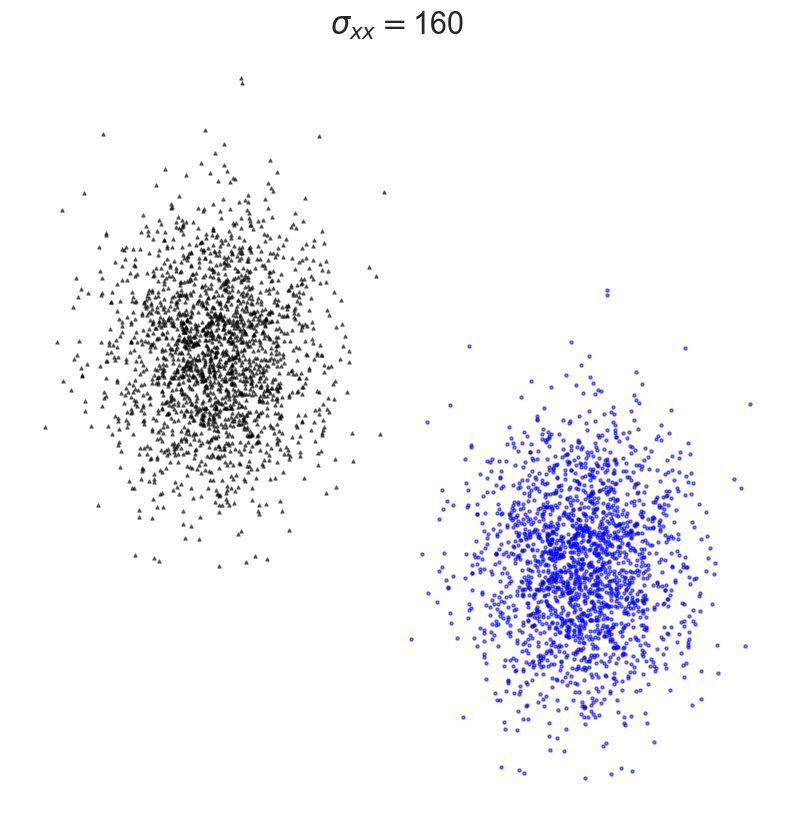

0.7737339900511814
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(18.305983177988566), np.float64(0.0))
Plotting


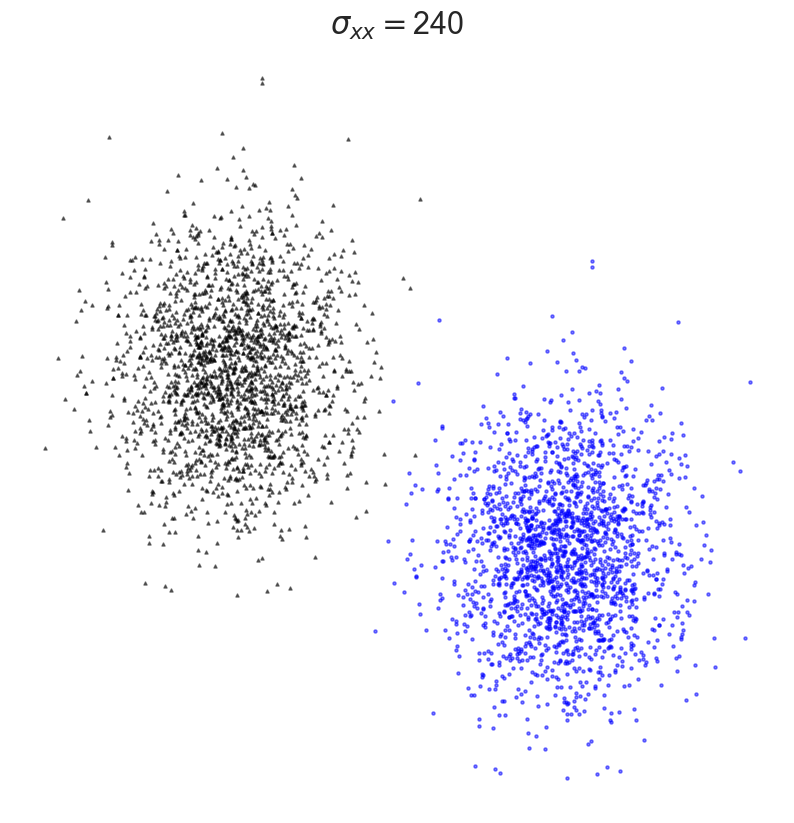

0.7537335501192151
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(14.354800434146597), np.float64(0.0))
Plotting


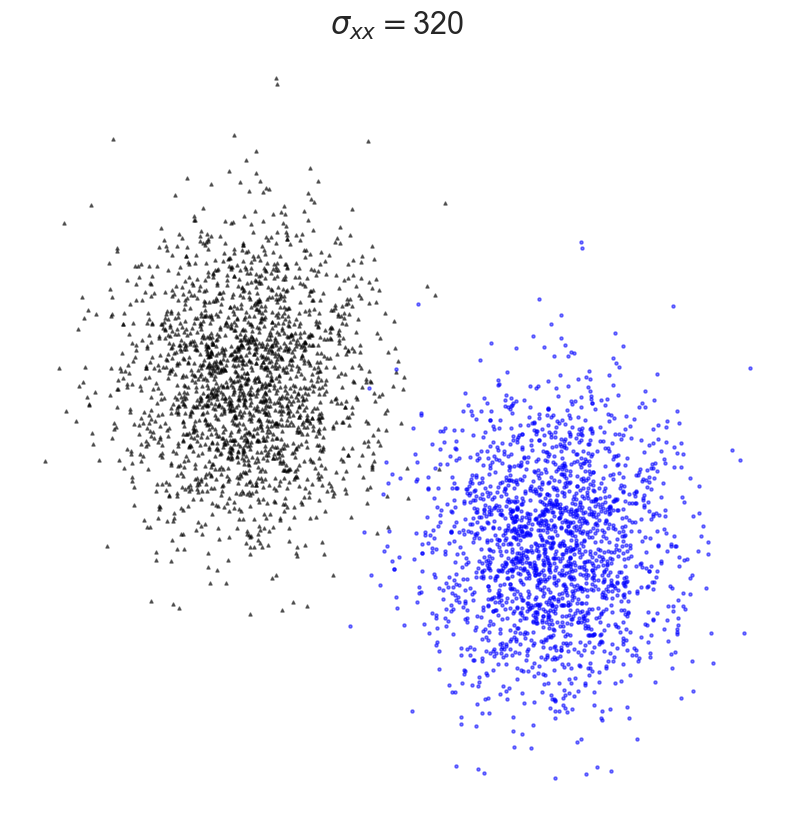

0.7382346233634318
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(11.244082389852267), np.float64(0.0))
Plotting


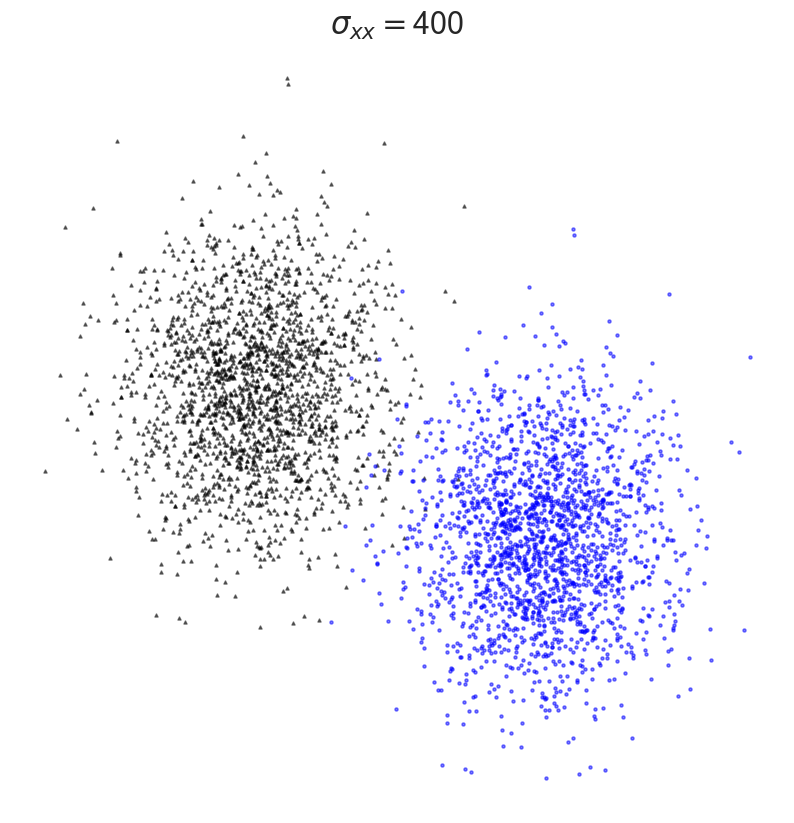

0.7258819350741489
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(9.121002308608482), np.float64(0.0))
Plotting


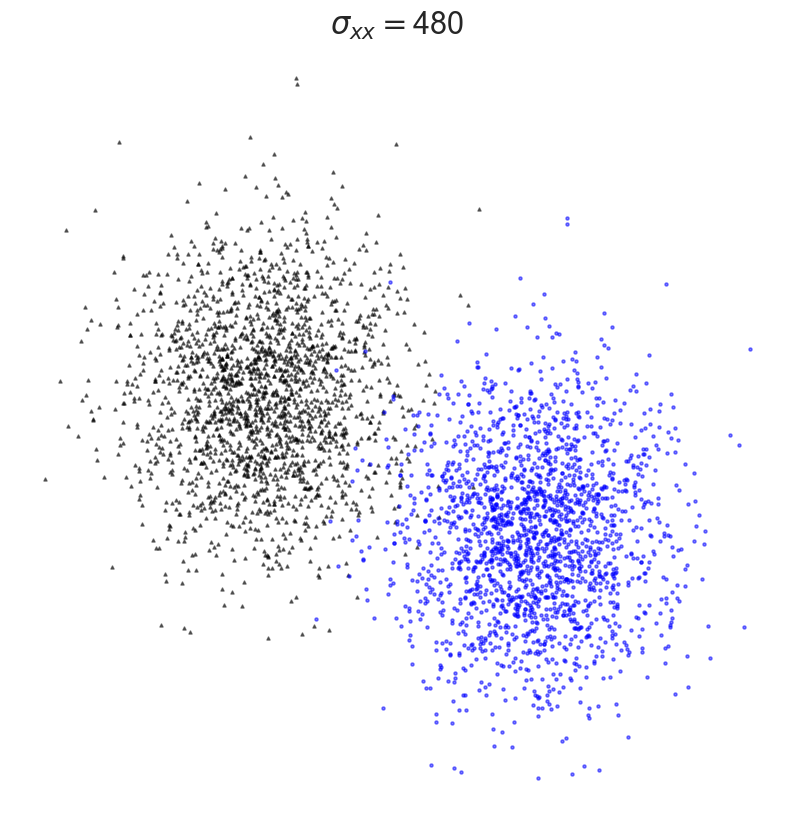

0.7077721379733588
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(5.446916032106998), np.float64(0.0))
Plotting


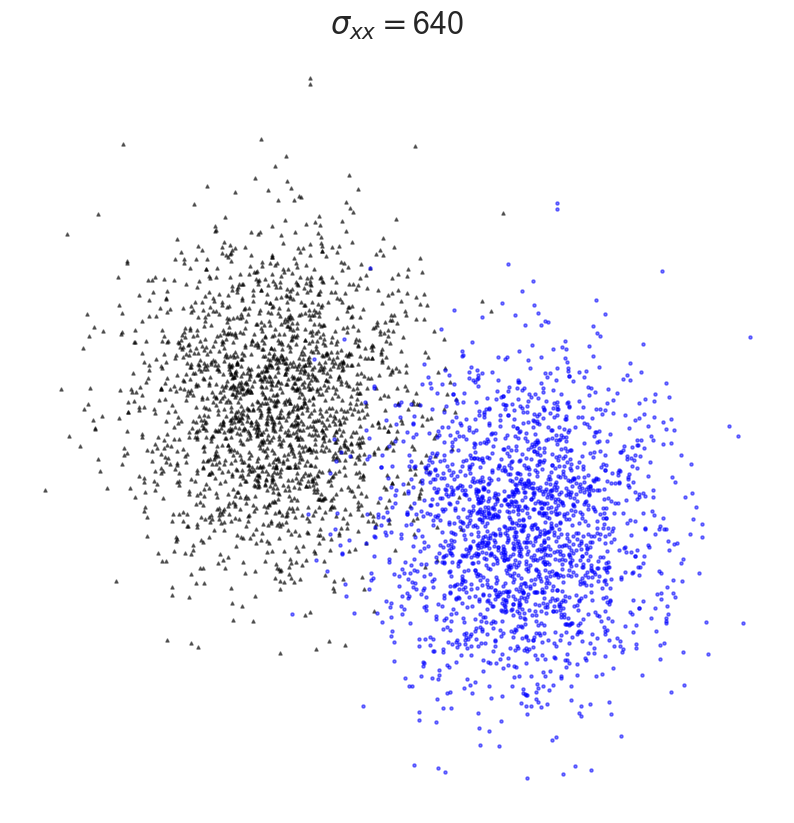

0.6997902739734045
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(4.620460785191639), np.float64(0.0))
Plotting


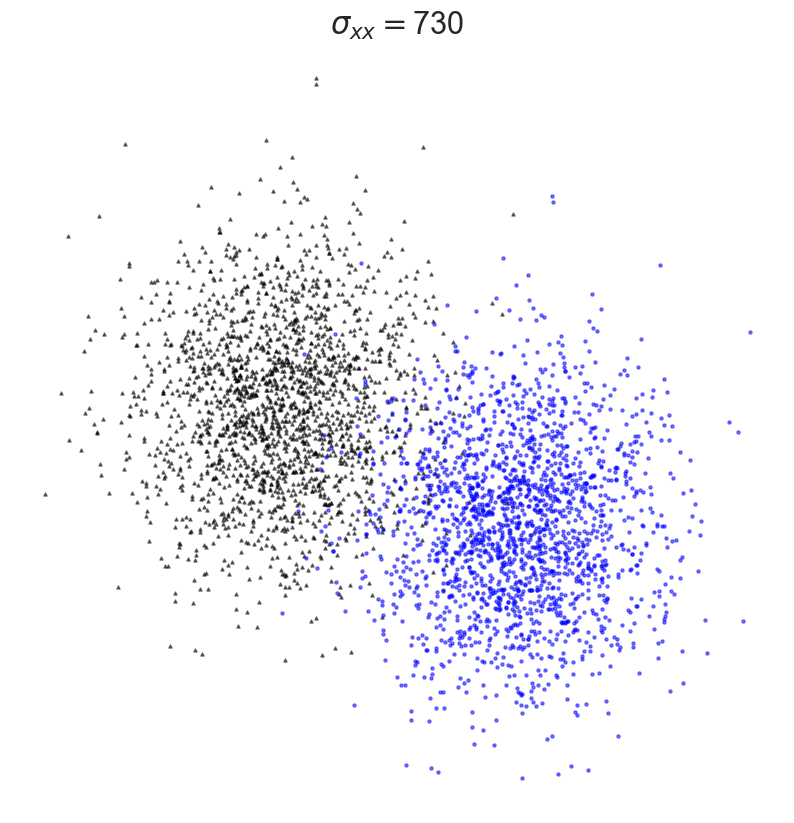

0.6963874029149288
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(3.9554749174776305), np.float64(0.0))
Plotting


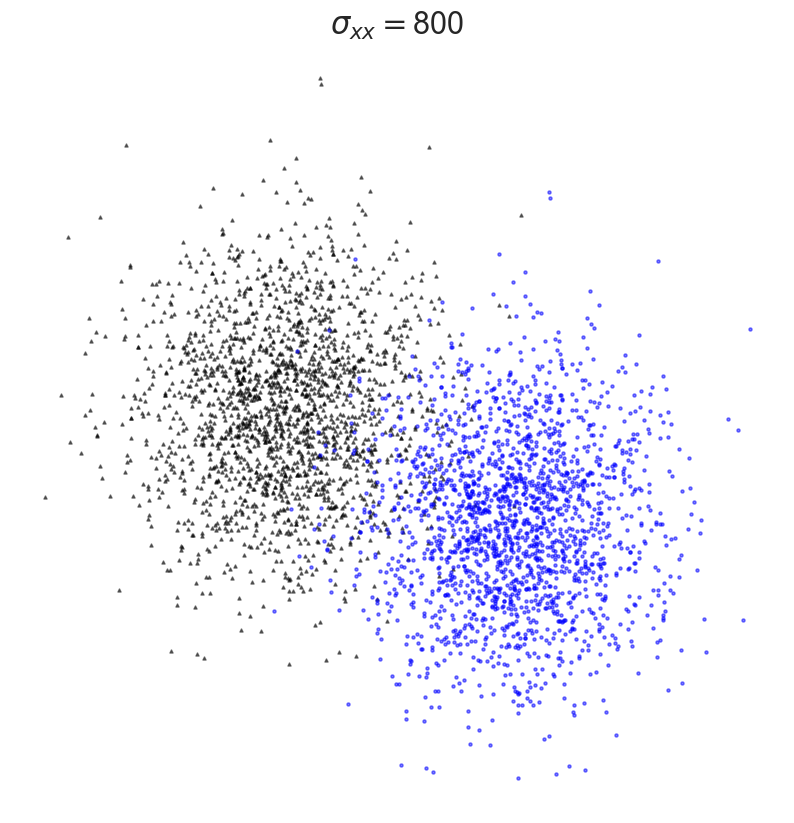

0.6828965194129073
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(1.987549997855922), np.float64(0.0))
Plotting


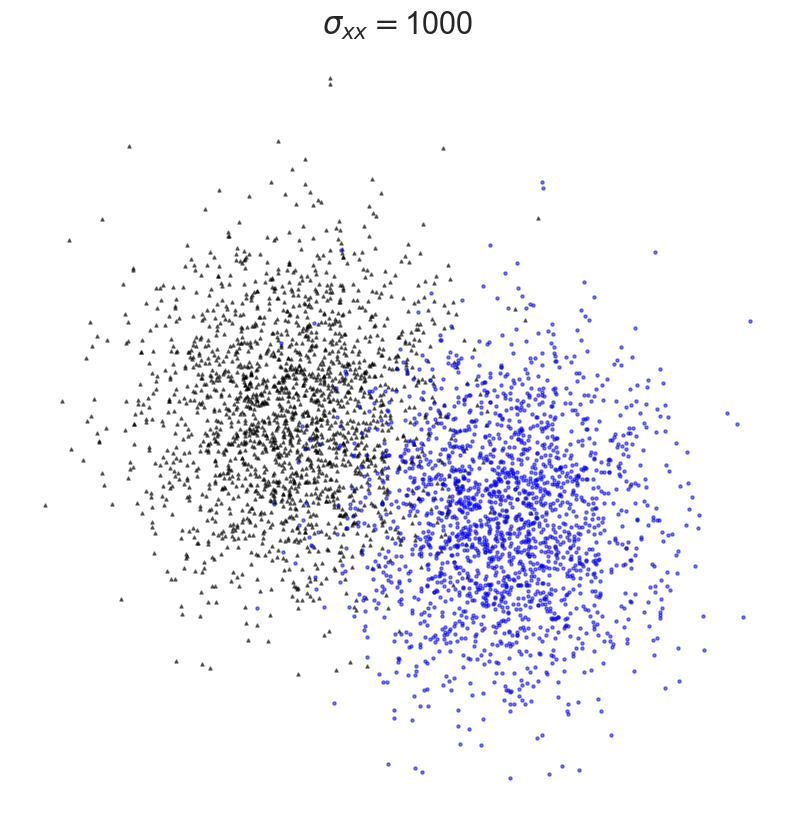

0.6635841031487626
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(0.021248181150326673), np.float64(0.0))
Plotting


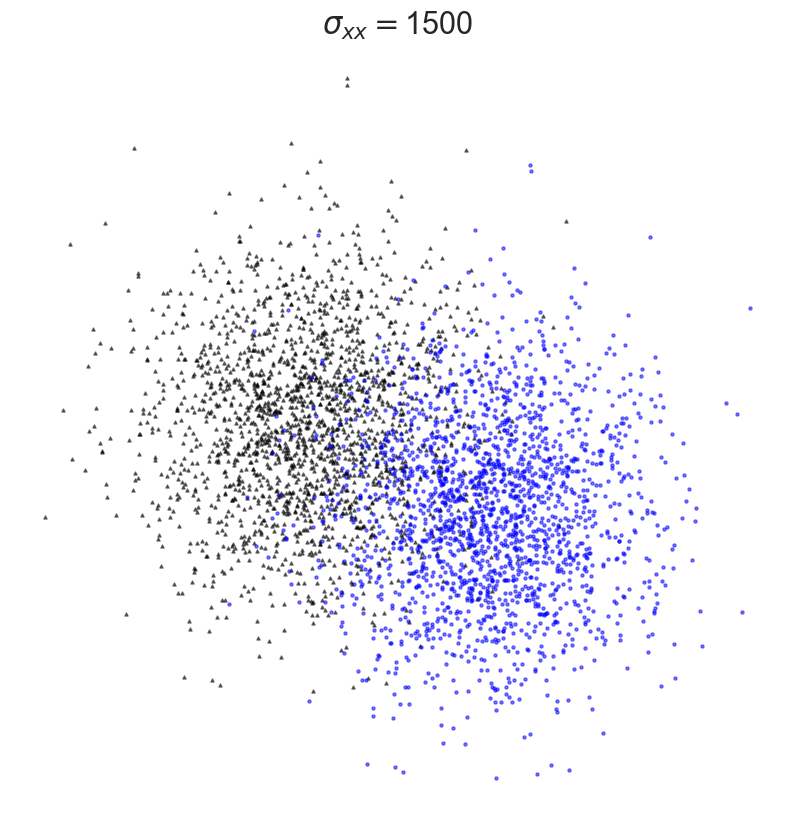

0.651995436155736
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(-0.8401357622432357), np.float64(0.0))
Plotting


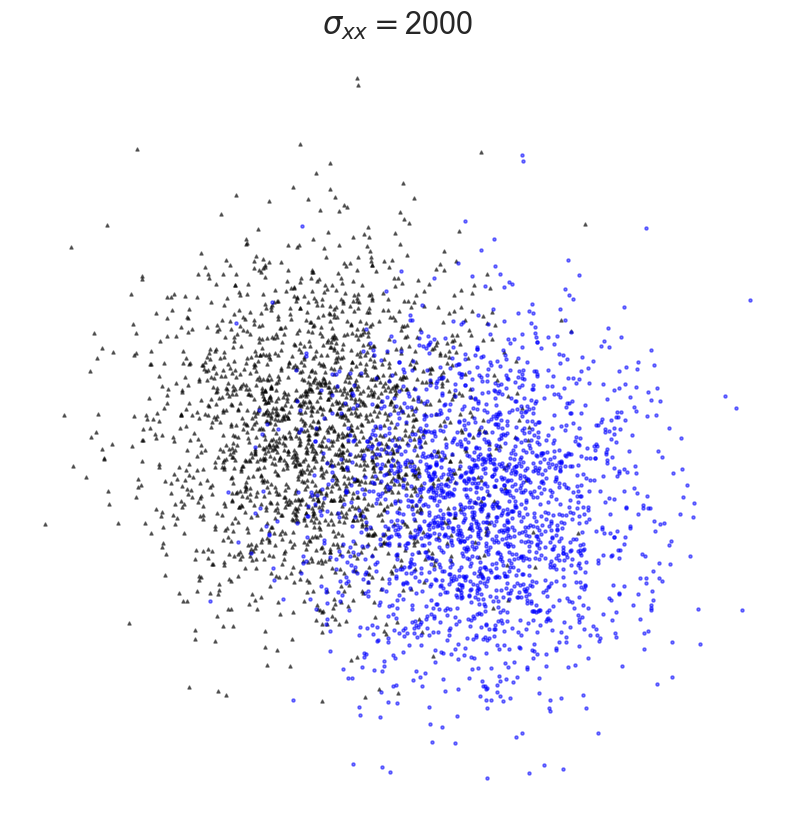

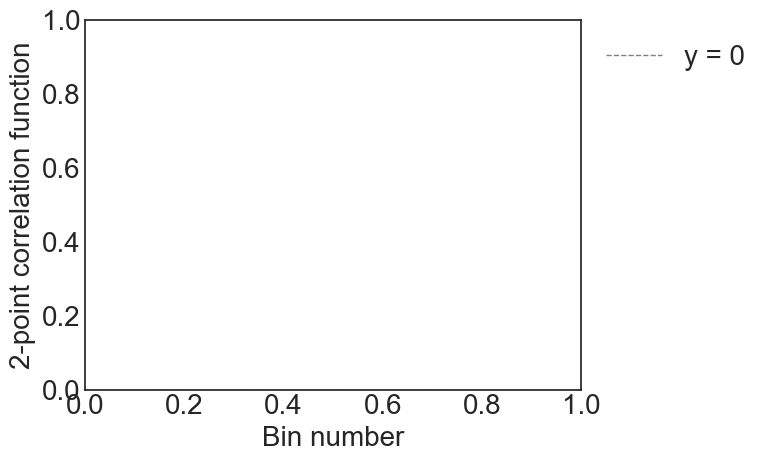

In [23]:
times_array = []
chi_scores = []
norm_scores = []
davies_scores = []
sim_scores = []

dimensions = 2 
mean_range = (-150, 150)
cov_range = (-10, 10)  
num_samples = 2
points_per_gaussian = 2000
n_points = points_per_gaussian*num_samples
structure = []
a = 100
b = 100
structure = []
labels = []
acc = []
importlib.reload(AstroMLmod)

cov_ranges  = [80,160,240,320,400,480,640,730,800,1000,1500,2000]

for i in range(num_samples):
    for item in range(points_per_gaussian):
        labels.append(i)
        
for cov_diagonal in cov_ranges:

    #obtain means within a range    
    means, _ = dist.sample_means_and_covariances(dimensions, mean_range, cov_range, num_samples, seed =42)
    
    covariances = dist.symmetric_covariance(cov_diagonal,
                                            dimension = dimensions)


    #Ceatures the feature space one cluster at a time from means and covariances
        
    gaussian_space = dist.generate_gaussian_points(mean = means[0]/2,
                                                   cov = covariances[0],
                                                   n_points =points_per_gaussian,
                                                   seed = 42)  # places cluster at position "mean"
    for mean in means[1:]:
            
        gaussian_space = np.concatenate((gaussian_space,
                                         dist.generate_gaussian_points(mean, covariances[0],points_per_gaussian,seed = 42)),
                                        axis = 0)

            
    gaussian_space = gaussian_space


    #clustering

    k_labels = dist.kmeans(gaussian_space,
                           n_clusters = 2)

        
    #plt.show()
    #scores
    
    davies_ = davies(gaussian_space,k_labels)
    val = test.KNN_accuracy(gaussian_space,labels)
    sim_score = viz.similarity_index(labels,k_labels)
    
    #dist.scatter_points(data_R, alpha = 0.10)


    timer = time.time()
    """
    corr, dcorr, NormScore = AstroMLmod.correlate_and_plot(gaussian_space, 
                                                              plot = True, 
                                                              background_factor = 1,
                                                               bin_number = 200,
                                                              return_corr = True)
    """
        
    corr, dcorr, NormScore = AstroMLmod.correlate_and_plot(gaussian_space,
                                                        min_dist = 0.0,
                                                        max_dist =1.5,
                                                        label = "Correlation on flat manifold for epoch:"+str(cov_diagonal),
                                                        fig_name = "plots/2PCR@Epoch: "+str(cov_diagonal),
                                                        precomputed_RR = None,
                                                        bin_number = 100,
                                                        method = "standard",
                                                        bootstrap  = True,
                                                        plot = False,
                                                        return_corr = True,
                                                        background_factor = 1,
                                                        representations = [])


    bins = np.logspace(np.log10(1), np.log10(100), 200)

    #metrics
    norm_scores.append(NormScore)
    acc.append(val)
    davies_scores.append(davies_)
    sim_scores.append(sim_score)



    viz.shade(name = "$\sigma_{xx}  = $"+str(cov_diagonal),predictions = labels,numof_class =len(means),embedded_dataset = gaussian_space,alpha = 0.5,size = 5,hard_coloring = True)        


    if cov_range[0] in [0]:#[2.5,160,320,640]:
        line, = plt.plot(bins[1:],corr,
                             label = "COV[0]: "+ str(cov_range[0]))
        plt.fill_between(bins[1:],corr- dcorr, corr+dcorr, color = line.get_color(),alpha = .3)
    
plt.axhline(0, color='gray', linestyle='--', linewidth=1,label = "y = 0") 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("2-point correlation function")
plt.xlabel("Bin number")
plt.show()

# Plotting the  structure content

<Figure size 1920x1440 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

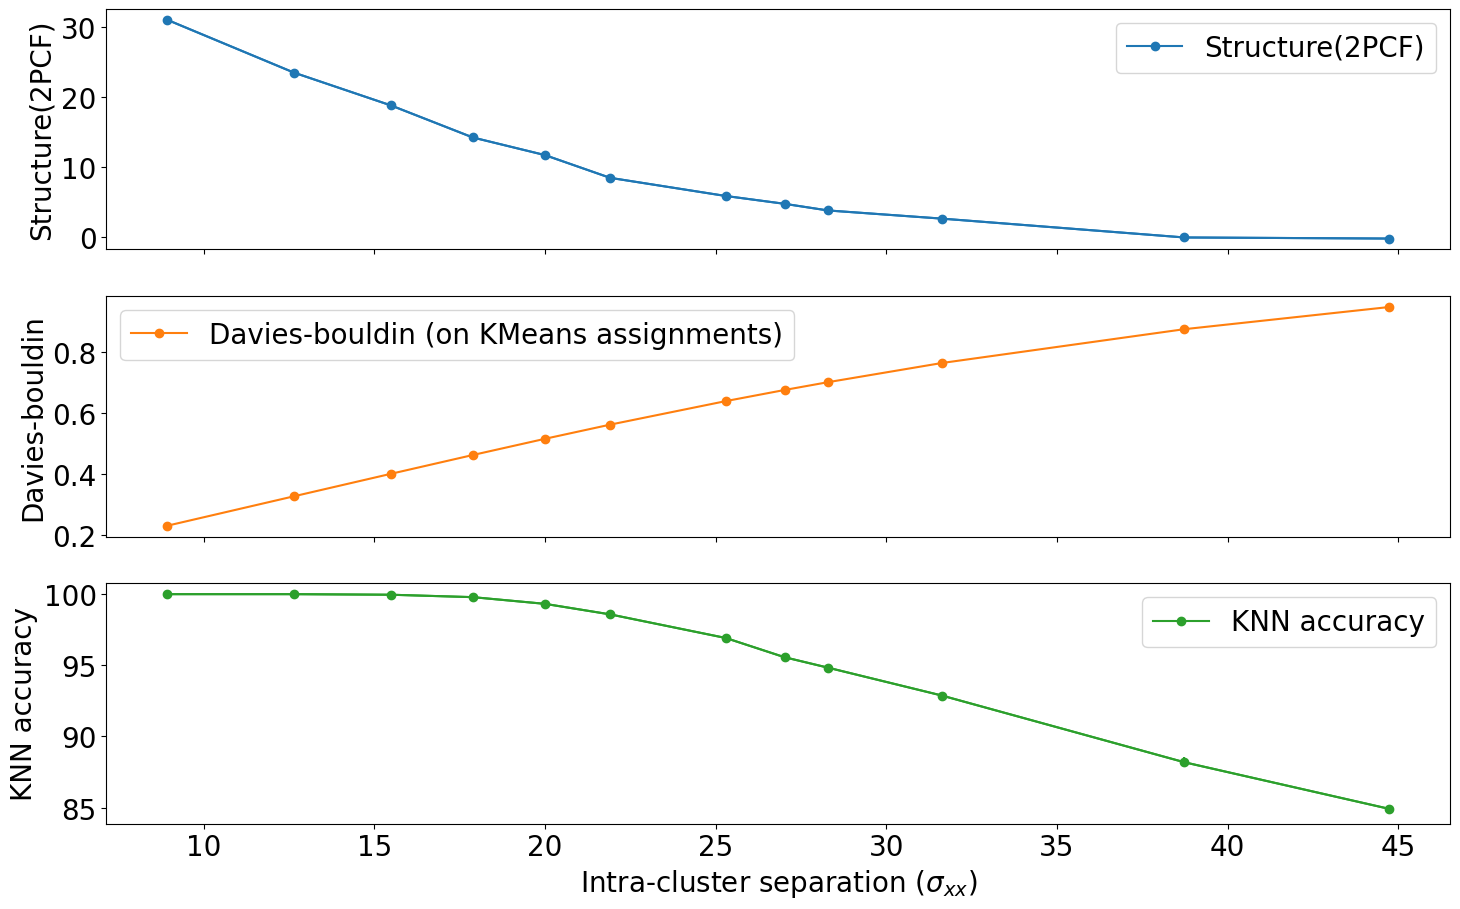

In [20]:
fig = plt.figure(dpi = 300)

plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20}) 
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(15, 10))


x = [np.sqrt(cov) for cov in cov_ranges]
yerr = np.array([b for a,b in norm_scores])
y = np.array([a for a,b in  norm_scores])
#plt.plot(x, y,color = "blue",marker = "o",alpha = 0.3)

#plt.errorbar(x, y, yerr = yerr, color = "blue",alpha = 1)

axs[0].plot(x, y,color = "C0",marker = "o",alpha = 1,label='Structure(2PCF)')

axs[0].errorbar(x, y, yerr = yerr, color = "C0",alpha = 1)

axs[0].set_ylabel('Structure(2PCF)')
axs[0].legend()


axs[1].plot(x, [a for a in davies_scores],color = "C1",marker = "o",alpha = 1,label='Davies-bouldin (on KMeans assignments)')


axs[1].set_ylabel('Davies-bouldin')
axs[1].legend()


axs[2].plot(x,[a for a,b in acc], marker = "o",alpha = 1,label='KNN accuracy', color = "C2")
axs[2].errorbar(x, [a for a,b in acc],yerr = [b for a,b in  acc], color = "C2",alpha = 1)

axs[2].set_ylabel('KNN accuracy')
axs[2].set_xlabel('Intra-cluster separation ($\sigma_{xx}$)')
axs[2].legend()

# Add a global title
#fig.suptitle('Stacked Subplots with Shared X-axis', fontsize=16)
# Adjust spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show plot
plt.show()

# Gaussian Zoo generator

## Cluster separation

0.9285461136947653
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(39.57069756897138), np.float64(0.0))
Plotting


<Figure size 1920x1440 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

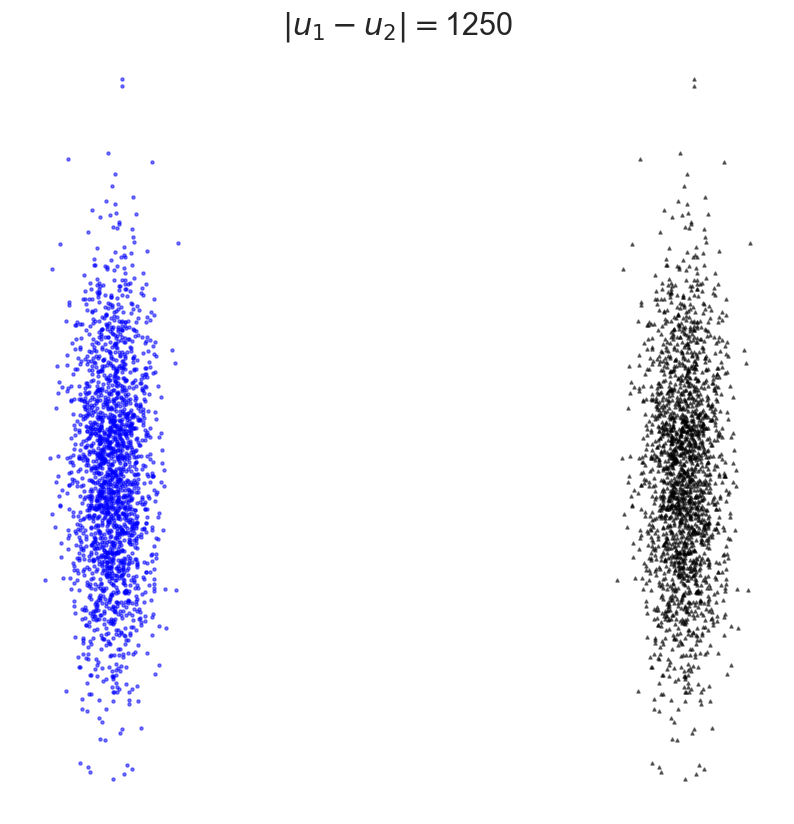

0.8744605933348504
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(34.25044968679484), np.float64(0.0))
Plotting


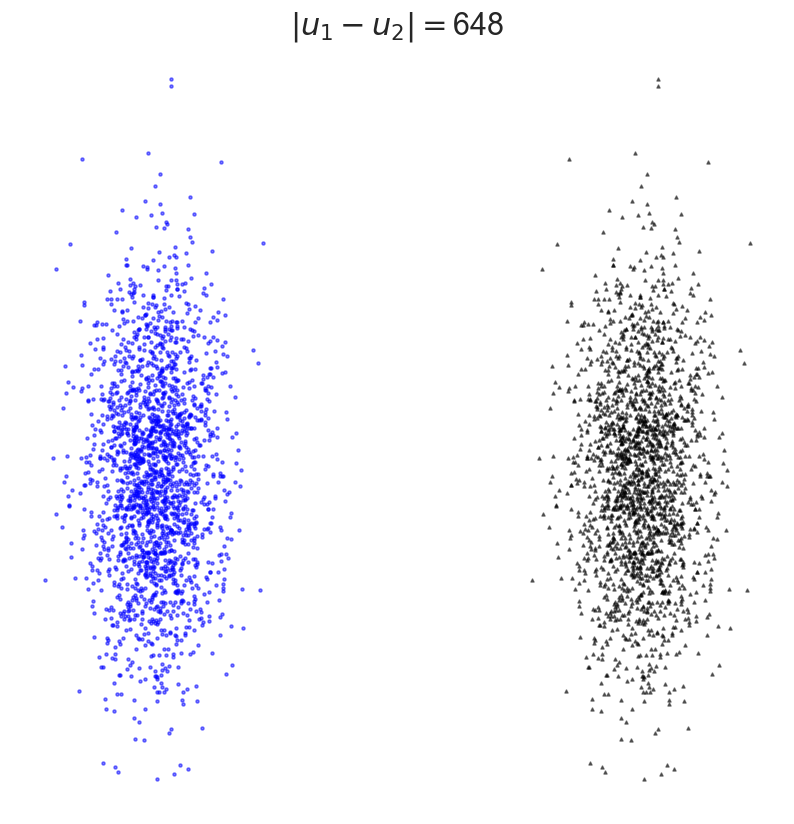

0.8495466583957203
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(29.588600088280515), np.float64(0.0))
Plotting


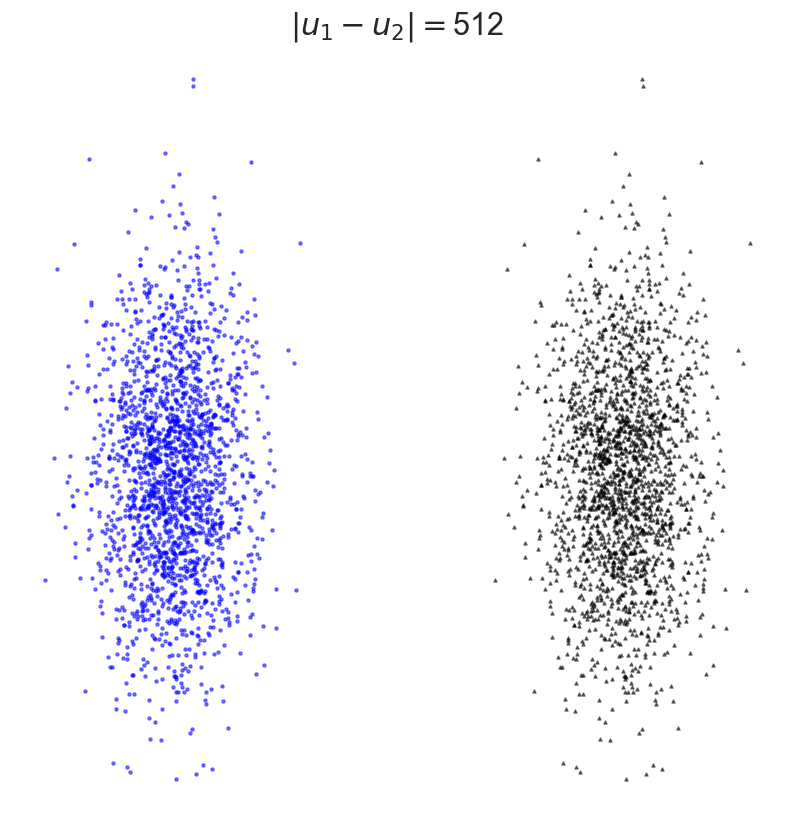

0.8175517128444629
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(25.58974475983551), np.float64(0.0))
Plotting


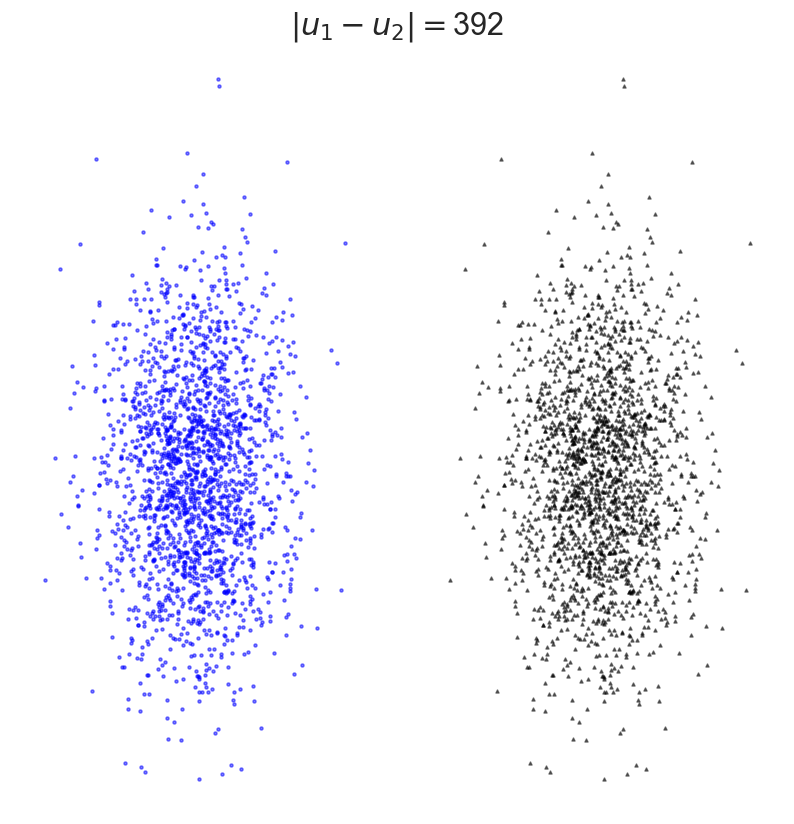

0.7754601937782977
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(18.188247707996723), np.float64(0.0))
Plotting


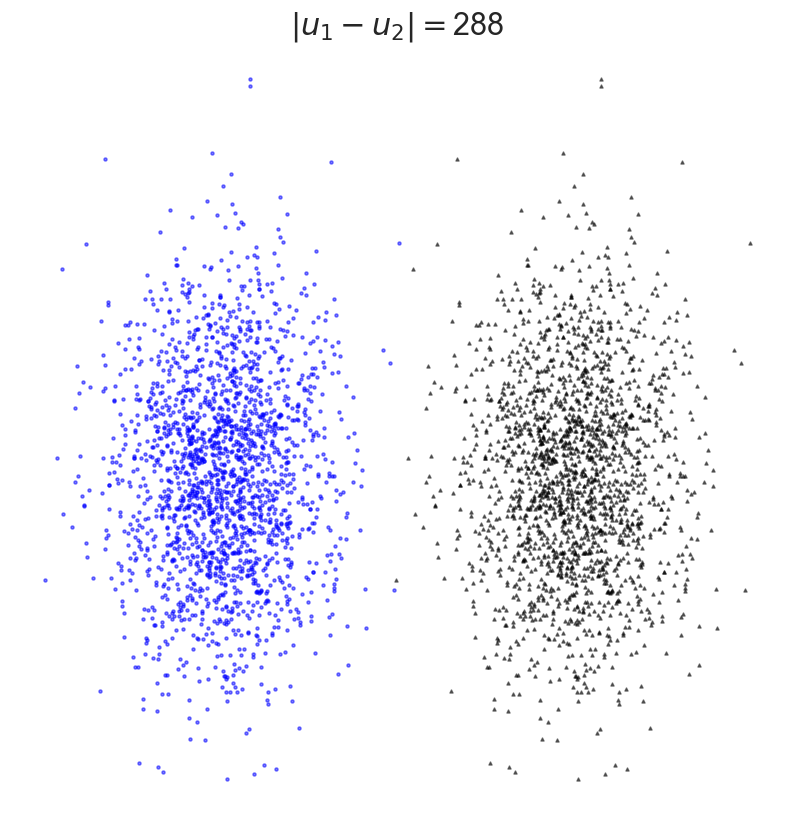

0.7286068093818477
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(9.276092684999952), np.float64(0.0))
Plotting


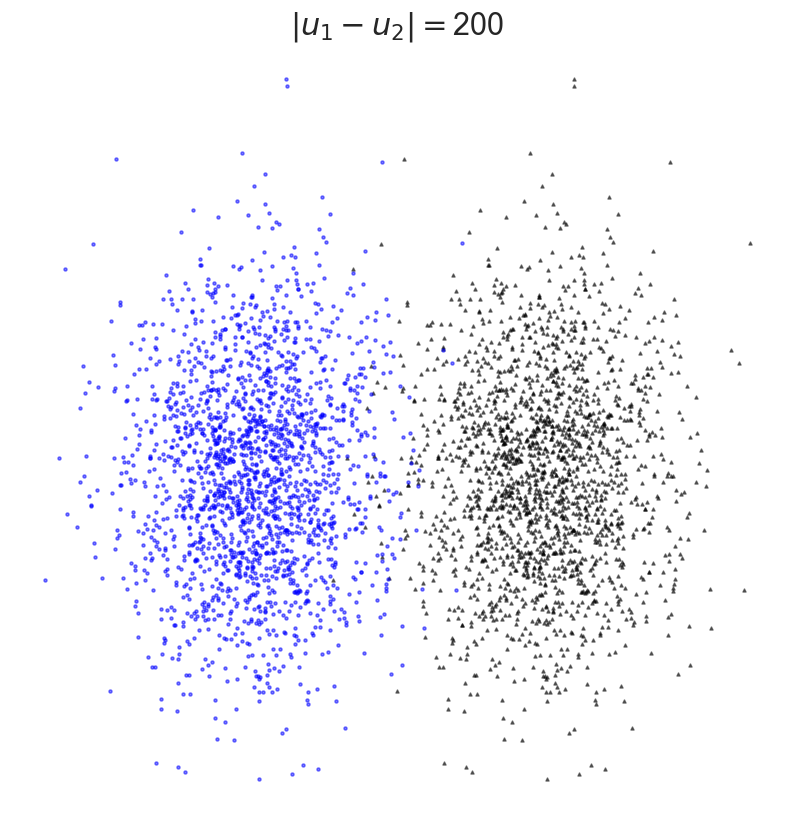

0.6780489599119165
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(1.1624459175259005), np.float64(0.0))
Plotting


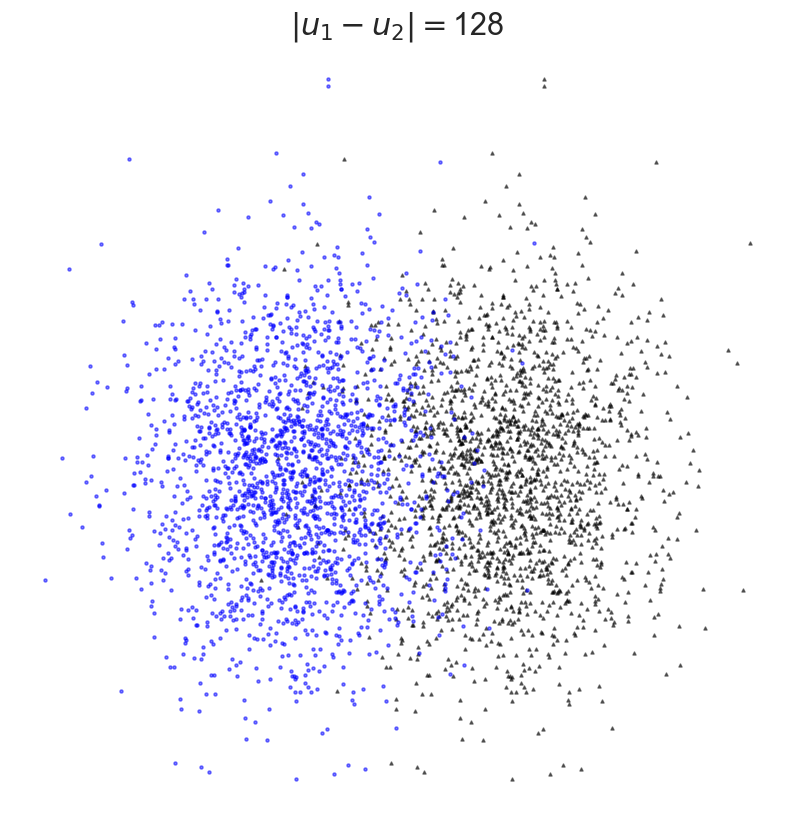

0.6364364665628509
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(-0.9674348891002467), np.float64(0.0))
Plotting


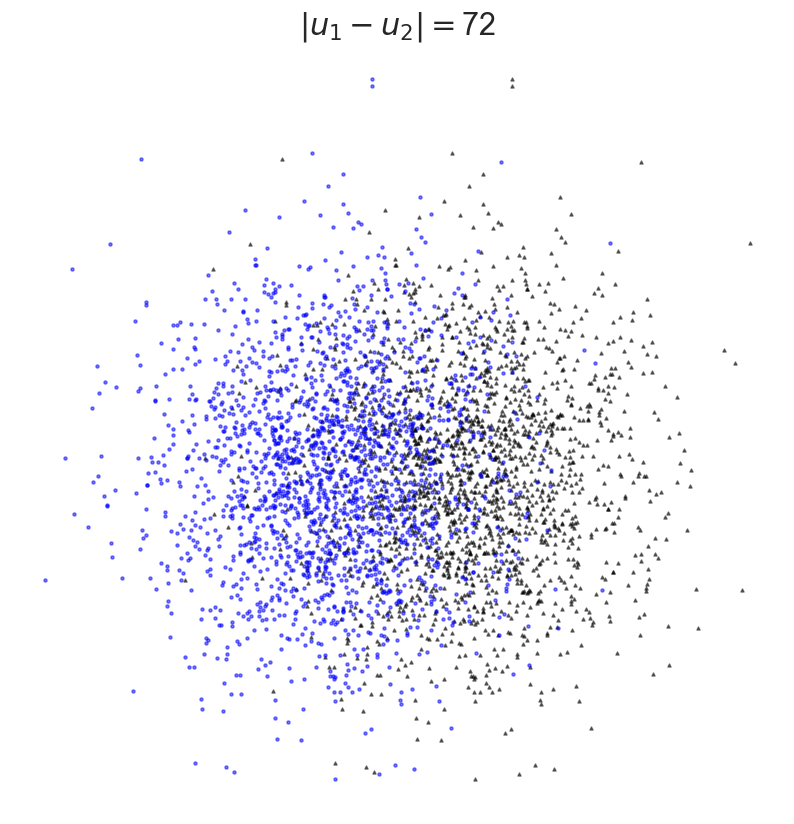

0.6395848310611303
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(-0.5429092104551927), np.float64(0.0))
Plotting


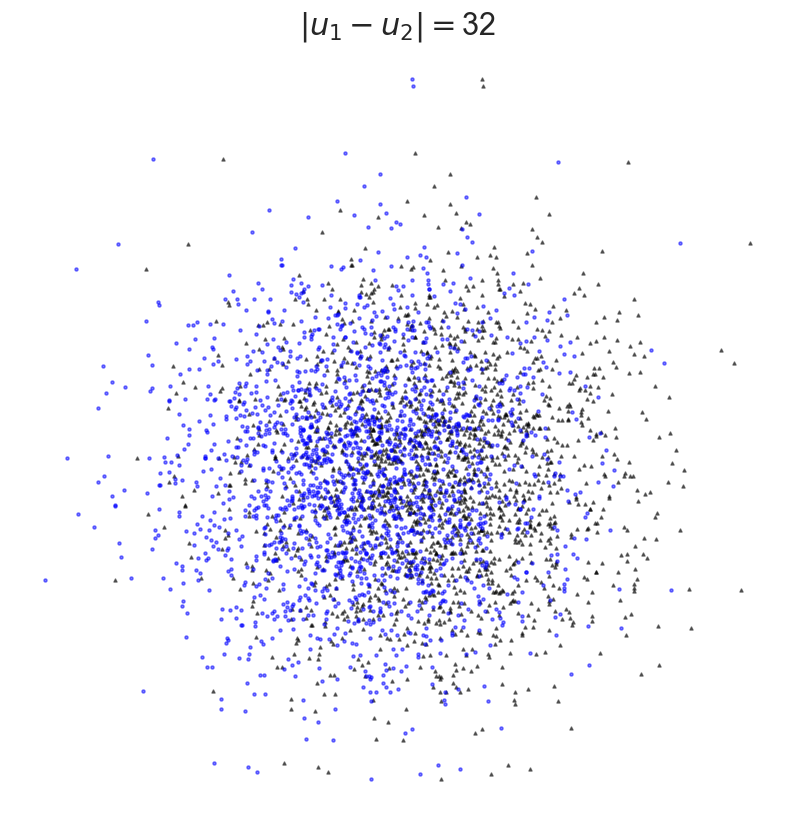

0.6465752475928472
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(-0.6438359820977695), np.float64(0.0))
Plotting


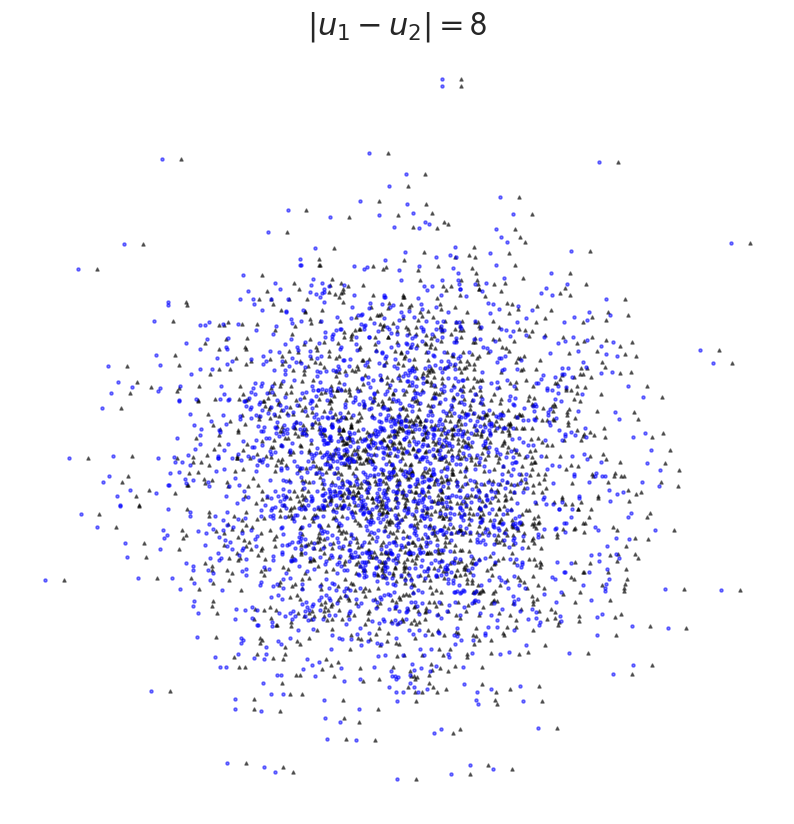

0.6407509538506158
Computing background and RR distributions: will be slower
Background factor 1
Number of valid bins:  99
Repley's K:  (np.float64(-0.35268430083239366), np.float64(0.0))
Plotting


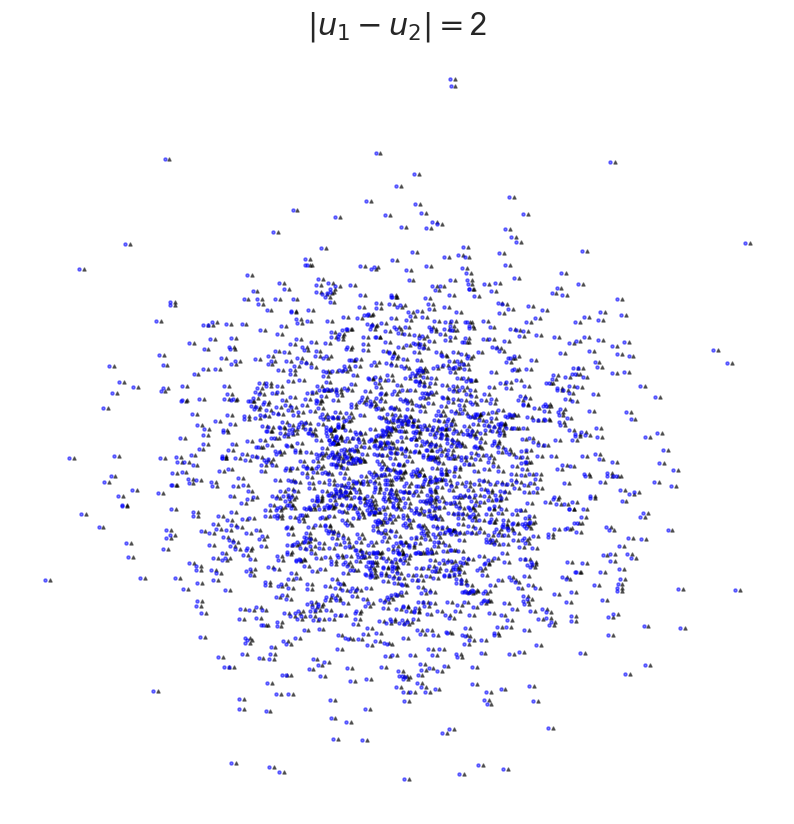

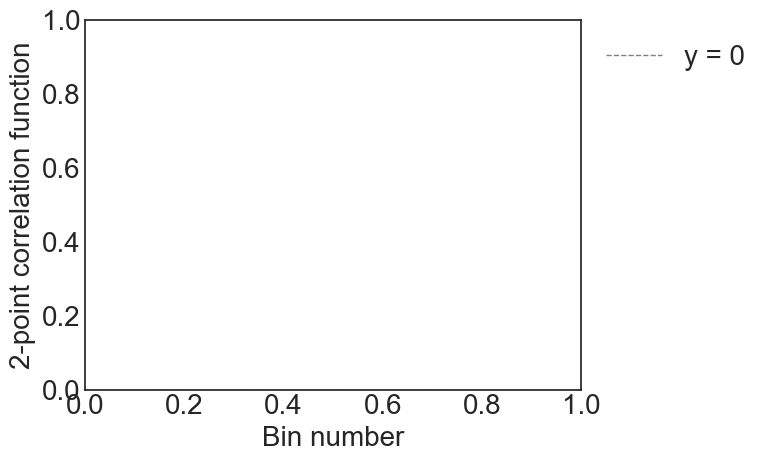

In [24]:
importlib.reload(dist)
importlib.reload(dist)
importlib.reload(AstroMLmod)


import numpy as np
fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20})


cov_range = []
times_array = []
chi_scores = []
norm_scores = []
davies_scores =[]
acc = []
sim_scores = []


dimensions = 2  
mean_range = (-50, 50)
cov_range = (-10, 10)  
num_samples = 2 
points_per_gaussian = 2000
n_points = points_per_gaussian*num_samples
structure = []
a = 100
b = 100

cov_diagonal = 10
cov_range  = [5]
mean_separation =  [25,18,16,14,12,10,8,6,4,2,1]
labels = []


for i in range(num_samples):
    for item in range(points_per_gaussian):
        labels.append(i)

    


for separation in mean_separation:
    separation = separation**2
    
    means = np.array([[separation,0],[-separation,0]])
    
    #Ceatures the feature space one cluster at a time from means and covariances
        
    gaussian_space = dist.generate_gaussian_points(mean = means[0],
                                                   cov = covariances[0],
                                                   n_points =points_per_gaussian,
                                                   seed = 42)  # places cluster at position "mean"

    for mean in means[1:]:
            
        gaussian_space = np.concatenate((gaussian_space,
                                         dist.generate_gaussian_points(means[1], covariances[0],points_per_gaussian,seed = 42)),
                                        axis = 0)

            
    gaussian_space = gaussian_space


    #clustering

    k_labels = dist.kmeans(gaussian_space,
                           n_clusters = 2)

        
    #plt.show()
    #scores
    
    davies_ = davies(gaussian_space,k_labels)
    val = test.KNN_accuracy(gaussian_space,labels)
    sim_score = viz.similarity_index(labels,k_labels)
    
    #dist.scatter_points(data_R, alpha = 0.10)


    timer = time.time()
    """
    corr, dcorr, NormScore = AstroMLmod.correlate_and_plot(gaussian_space, 
                                                              plot = True, 
                                                              background_factor = 1,
                                                               bin_number = 200,
                                                              return_corr = True)
    """
        
    corr, dcorr, NormScore = AstroMLmod.correlate_and_plot(gaussian_space,
                                                        min_dist = 0.0,
                                                        max_dist =1.5,
                                                        label = "Correlation on flat manifold for epoch:"+str(cov_diagonal),
                                                        fig_name = "plots/2PCR@Epoch: "+str(cov_diagonal),
                                                        precomputed_RR = None,
                                                        bin_number = 100,
                                                        method = "standard",
                                                        bootstrap  = True,
                                                        plot = False,
                                                        return_corr = True,
                                                        background_factor = 1,
                                                        representations = [])


    bins = np.logspace(np.log10(1), np.log10(100), 200)

    #metrics
    norm_scores.append(NormScore)
    acc.append(val)
    davies_scores.append(davies_)
    sim_scores.append(sim_score)



    viz.shade(name = "$ |u_1-u_2|  = $"+str(separation*2),predictions = labels,numof_class =len(means),embedded_dataset = gaussian_space,alpha = 0.5,size = 5,hard_coloring = True)        


    if cov_range[0] in [0]:#[2.5,160,320,640]:
        line, = plt.plot(bins[1:],corr,
                             label = "COV[0]: "+ str(cov_range[0]))
        plt.fill_between(bins[1:],corr- dcorr, corr+dcorr, color = line.get_color(),alpha = .3)
    
plt.axhline(0, color='gray', linestyle='--', linewidth=1,label = "y = 0") 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("2-point correlation function")
plt.xlabel("Bin number")
plt.show()

    

<Figure size 1920x1440 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

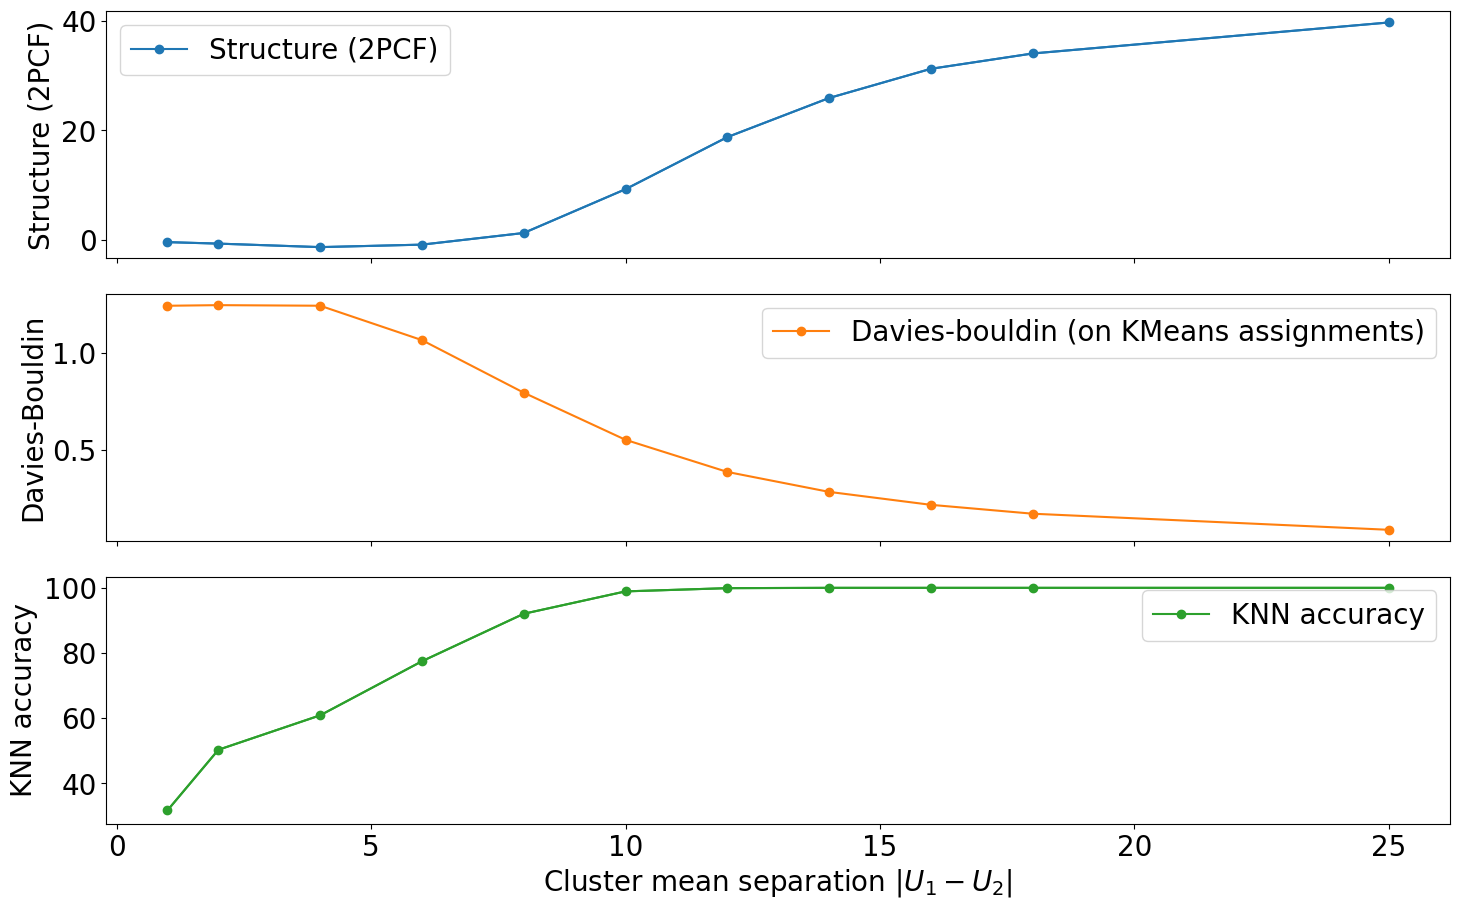

In [18]:
fig = plt.figure(dpi = 300)

plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20}) 
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(15, 10))


x = [sep for sep in  mean_separation]
yerr = np.array([b for a,b in norm_scores])
y = np.array([a for a,b in  norm_scores])

#plt.plot(x, y,color = "blue",marker = "o",alpha = 0.3)
#plt.errorbar(x, y, yerr = yerr, color = "blue",alpha = 1)

axs[0].plot(x, y,color = "C0",marker = "o",alpha = 1,label='Structure (2PCF)')

axs[0].errorbar(x, y, yerr = yerr, color = "C0",alpha = 1)

axs[0].set_ylabel('Structure (2PCF)')
axs[0].legend()


axs[1].plot(x, [a for a in davies_scores],color = "C1",marker = "o",alpha = 1,label='Davies-bouldin (on KMeans assignments)')


axs[1].set_ylabel('Davies-Bouldin')
axs[1].legend()


axs[2].plot(x,[a for a,b in acc], marker = "o",alpha = 1,label='KNN accuracy', color = "C2")
axs[2].errorbar(x, [a for a,b in acc],yerr = [b for a,b in  acc], color = "C2",alpha = 1)

axs[2].set_ylabel('KNN accuracy')
axs[2].set_xlabel('Cluster mean separation $|U_1 - U_2|$')
axs[2].legend()

# Add a global title
#fig.suptitle('Stacked Subplots with Shared X-axis', fontsize=16)
# Adjust spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show plot
plt.show()